In [2]:
import pandas as pd
import numpy as np
import glob
import os
#from PIL import Image
import urllib.request
import requests
import io
import cv2
import json
#import skimage.transform
#import scipy.misc
import imageio
from PIL import Image
import matplotlib.image as img

In [40]:
all_data = pd.DataFrame()
#path to csv files
path=(r"C:/Users/kathe/Documents/CS230/project/proj/")
i=0
merged=None
for f in glob.glob("**/*.csv"):
    if merged is None:
        merged = pd.read_csv(f,header=None)
    else:
        merged=merged.append(pd.read_csv(f,header=None), sort=False, ignore_index=True)
#result=pd.concat(merged, ignore_index=True, sort=False)
merged.to_csv('merged.csv',index=False, header=False)

In [134]:
data=pd.read_csv(r"C:/Users/kathe/Documents/CS230/project/proj/merged.csv", header=None)
print(data)

               0                                                  1  2  3
0      amusement  http://farm4.staticflickr.com/3935/15670302655...  5  0
1      amusement  http://farm9.staticflickr.com/8519/8667561987_...  5  0
2      amusement  http://farm4.staticflickr.com/3802/9566768469_...  0  5
3      amusement  http://farm9.staticflickr.com/8231/8565444625_...  3  2
4      amusement  http://farm4.staticflickr.com/3736/9929371604_...  2  3
5      amusement  http://farm6.staticflickr.com/5336/9472957715_...  1  4
6      amusement  http://farm9.staticflickr.com/8183/8095358518_...  0  5
7      amusement  http://farm8.staticflickr.com/7107/7814376988_...  5  0
8      amusement  http://farm8.staticflickr.com/7211/7025985527_...  3  2
9      amusement  http://farm8.staticflickr.com/7314/12386606195...  5  0
10     amusement  http://farm9.staticflickr.com/8508/8580642223_...  3  2
11     amusement  http://farm6.staticflickr.com/5494/10841361643...  1  4
12     amusement  http://farm8.staticf

In [1]:
images=[];
labels=['amusement','anger','awe','contentment','disgust','excitement','fear','sadness'];
####img_path is a folder YOU MAKE, where all of your images will be stored to, make sure that r stays in front of the quote ######
img_path= r'C:\DeepConnotationDataset'
temp_path=r'C:\Users\noahj\Documents\tempImg.jpg';
bad=r'C:\Users\noahj\Documents\BadImage.jpg'
X_names=strs = ["" for x in range(data.shape[0])]
Y=np.zeros((data.shape[0],1)) #each row is a label (0-7)
num=0
size=(32,32)
for i in range (data.shape[0]):
    URL=(data[1][i])
    try:
        with urllib.request.urlopen(URL) as url:
            name='\img'+str(num)+'.jpg'
            pic = url.read();
            temp = open(temp_path, 'wb').write(pic)
            a = cv2.imread(temp_path)
            b = cv2.imread(bad)
            if (not(a.shape == b.shape and not(np.bitwise_xor(a,b).any()))):
                with open(img_path+name, 'wb') as f:
                    f.write(pic)
                    img = Image.open(img_path+name)
                    img = img.resize(size, Image.ANTIALIAS)
                    img.save(img_path+name) 
                    #save labels
                    X_names[num] = name
                    Y[num]=labels.index(data[0][i])
                    num=num+1
    except:
        pass

print("Number of images: ", num)


NameError: name 'data' is not defined

In [136]:
Y=Y[:num]
X=np.asarray(range(num))
idx = np.random.permutation(len(Y))
x,y = X[idx], Y[idx]

export = json.dumps({'X':X.astype(int).tolist(),'Y':Y.astype(int).tolist(),'idx':idx.tolist()}, separators=(',', ':'), indent=4)
f = open("initial.json","w")
f.write(export)
f.close()
print("Number of images: ",num)

Number of images:  84923


In [137]:
split1 = round(len(y)*.8)
split2 = split1 + round(len(y)*.1)

#Train: 80% data
trainX = x[:split1]
trainY = y[:split1]
#Dev set: 10% data
devX = x[split1:split2]
devY = y[split1:split2]
#Test set: 10% data
testX = x[split2:len(Y)]
testY = y[split2:len(Y)]

In [138]:
#write to json
export = json.dumps({'trainX':trainX.tolist(),'trainY':trainY[:,0].astype(int).tolist(),'devX':devX.tolist(),'devY':devY[:,0].astype(int).tolist(),'testX':testX.tolist(),'testY':testY[:,0].astype(int).tolist()}, separators=(',', ':'), indent=4)
f = open("labels.json","w")
f.write(export)
f.close()

In [143]:
#read from json
with open('initial.json') as json_data:
    d = json.load(json_data)
#(d['X'])
#labels=
#0:'amusement',
# 1:'anger',
# 2:'awe',
# 3:'contentment',
# 4:'disgust',
# 5:'excitement
# 6:'fear',
# 7:'sadness'
export = json.dumps({'idx':idx.tolist()}, separators=(',', ':'), indent=4)
f = open("idx.json","w")
f.write(export)
f.close()

In [152]:
def moveImg(i, arr, flder):
    curr_path = 'D:\CS230 Project\img' + str(arr[i]) + '.jpg'
    new_path = 'D:\CS230 Project\\'+flder+'_img\img' + str(i) + '.jpg'
    os.rename(curr_path, new_path)

In [153]:
#export images to train, dev, test folders
for i in range(len(trainX)):
    moveImg(i, trainX,'train')
for i in range(len(devX)):
    moveImg(i, devX,'dev')
for i in range(len(testX)):
    moveImg(i, testX,'test')

In [121]:
img = Image.open(temp_path)
img = img.resize(size, Image.ANTIALIAS)
img.save(temp_path) 

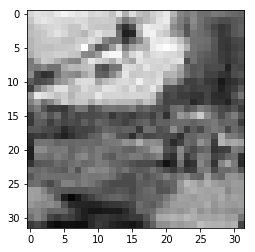

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
img = Image.open("../CS230 Project/dev_img/img480.jpg")
#print(img)
plt.imshow(img)

In [14]:
import json

def resize_image(img_name, shape):
    img = Image.open(img_name)
    img = img.resize(shape, Image.ANTIALIAS)
    img.save(img_name)

print("starting")
shape = (32,32)
img_path_train = "../CS230 Project/test_img/"
train_size = 1000000
for num in range(train_size):
    img_name = img_path_train + "img" + str(num) + ".jpg"
    resize_image(img_name, shape)
print("I am done")

starting


FileNotFoundError: [Errno 2] No such file or directory: '../CS230 Project/test_img/img8493.jpg'